In [1]:
import json
import sys
import fit
import task
import evaluate
import visualize
import networkx as nx
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


# Write parameters to config.json

In [2]:
config = \
{
    "data": "karate",
    "weighted": "false",
    "directed": "false",
    "method": "MatrixFactorization",
    "task": "LinkPrediction",
    "emb-path": "embedding/karate-mf.emd",
    "eval-path": "evaluation/karate-mf.txt",
    "train_percent": [
        0.1,
        0.5,
        0.9
    ],
    "dimensions": 128,
    "iter": 1,
    "seed": 1,
    "p": 1,
    "q": 1,
    "window-size": 10,
    "num-walks": 10,
    "walk-size": 80,
    "num-shuffles": 2,
    "order": 5,
    "k": 100,
    "fig-path": "plots/karate-mf.png"
}

with open("config.json", "w") as jsonfile:
    jsonfile.write(json.dumps(config))
    print("Write successful")

Write successful


# config.json

In [3]:
config_file = open("config.json", "r")
config = json.load(config_file)

# Read data

In [4]:
data = config['data']

In [5]:
data_path = "examples/" + data + ".gpickle"
G = nx.read_gpickle(data_path)

In [6]:
G.number_of_nodes()

34

In [7]:
G.number_of_edges()

77

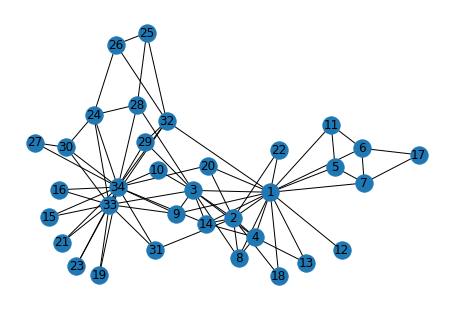

In [8]:
nx.draw(G, with_labels=True)

In [9]:
fit.model(config, G)

In [10]:
result = task.train(data_path, G, config)

Finding 39 of 484 non-edges
Found 39 negative edges of 77 total edges
Finding 20 of 522 non-edges
Found 20 negative edges of 39 total edges
Finding 10 of 541 non-edges
Found 10 negative edges of 20 total edges


In [11]:
result

defaultdict(list,
            {0.1: [0.5540540540540541],
             0.5: [0.8333333333333334],
             0.9: [0.33333333333333337]})

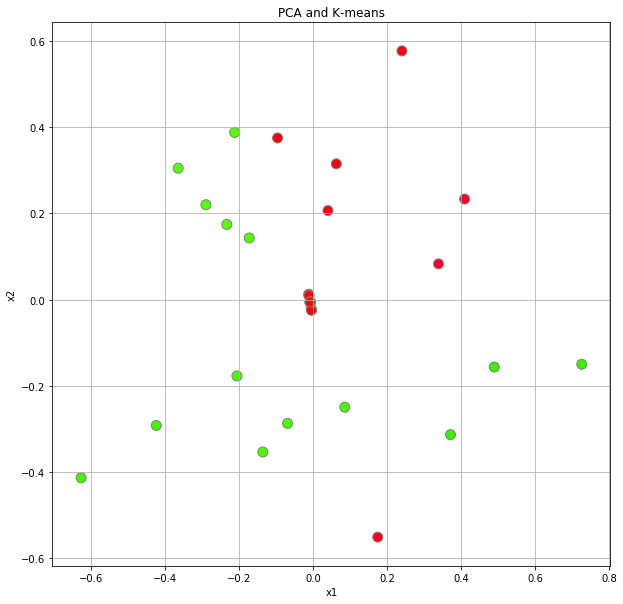

In [12]:
visualize.visualize(config)